In [28]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [13]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

font = {'size': 22}

matplotlib.rc('font', **font)

import numpy as np
import pandas as pd

import scipy
import scipy.stats
import seaborn as sns

import mrob

In [15]:
import sklearn.datasets

mean = np.zeros(6)
sigma = np.diag([1e-10,1e-10,0.1,0.001,0.01,1e-10])

norm_var = scipy.stats.multivariate_normal(mean,sigma)

In [29]:
N = 10_000
xi = norm_var.rvs(N)

In [30]:
df = pd.DataFrame(xi)

In [31]:
print(df)

                 0             1         2         3         4             5
0    -4.338868e-06 -1.076006e-05 -0.205220  0.028956  0.085383  1.198420e-06
1     1.946212e-05  1.394287e-06 -0.583858  0.019631  0.051785 -7.850843e-06
2     9.439224e-07 -6.104643e-07 -0.440723 -0.035375 -0.055777  5.198908e-06
3     4.356015e-06 -9.269225e-07  0.044394 -0.000230  0.002515  5.823103e-06
4     1.852360e-06 -1.523296e-05  0.207764 -0.047939 -0.050073 -1.403146e-05
...            ...           ...       ...       ...       ...           ...
9995  7.062141e-06  1.729504e-05  0.230916  0.039767  0.103177 -3.577394e-06
9996  1.873960e-05 -8.200511e-07  0.031119 -0.026068  0.027646  3.860128e-07
9997 -1.238935e-05  6.874172e-06 -0.002272  0.009238 -0.083268 -7.475403e-06
9998 -8.520205e-06  2.912587e-06  0.024659  0.064727 -0.018000 -2.303041e-05
9999 -6.712860e-06  1.987282e-05 -0.023322  0.015814  0.239327 -2.204658e-06

[10000 rows x 6 columns]


In [32]:
# g = sns.PairGrid(df, diag_sharey=False)
# g.map_upper(sns.scatterplot, s=15)
# g.map_lower(sns.kdeplot)
# g.map_diag(sns.kdeplot, lw=2)

In [33]:
propagated = []


for i in range(len(xi)):
    tmp = mrob.geometry.SE3([0,0,0.5,1,0,0])
    tmp.update_lhs(xi[i])
    propagated.append(tmp)

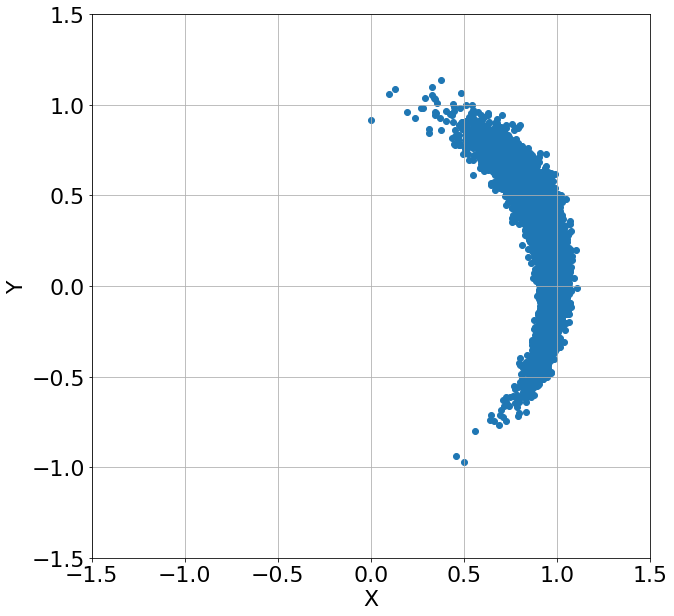

In [34]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

poses = np.array([x.t() for x in propagated])
poses = poses.reshape((-1,3))

plt.scatter(poses[:,0],poses[:,1])
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.show()

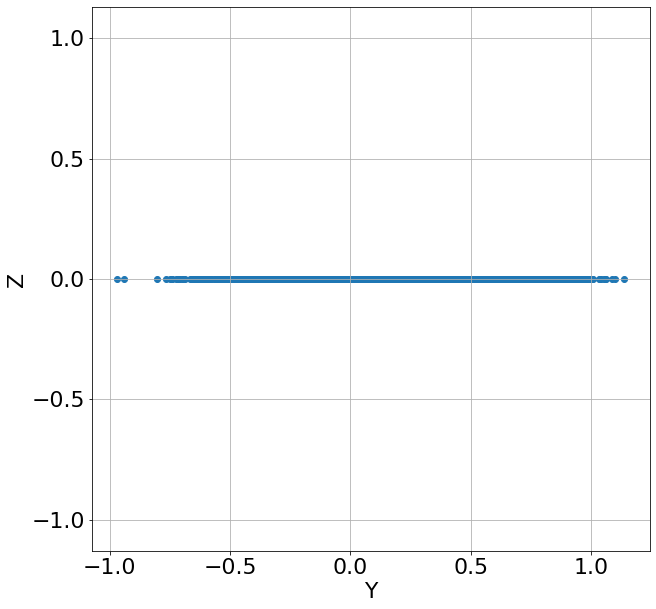

In [35]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

poses = np.array([x.t() for x in propagated])
poses = poses.reshape((-1,3))

plt.scatter(poses[:,1],poses[:,2])
plt.xlabel("Y")
plt.ylabel("Z")
plt.grid()
plt.axis('equal')
plt.show()